In [2]:
import pandas as pd

# Load the dataset to inspect its structure and content
file_path = '/content/Climate of England _ Professional Reforms.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Time                      96453 non-null  object 
 2   Summary                   96453 non-null  object 
 3   Precip Type               95936 non-null  object 
 4   Temperature (C)           96453 non-null  float64
 5   Apparent Temperature (C)  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  int64  
 8   Visibility (km)           96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Humidity                  96453 non-null  float64
 11  Month                     96453 non-null  int64  
 12  Day                       96453 non-null  int64  
 13  Year                      96453 non-null  int64  
dtypes: flo

(  Formatted Date     Time        Summary Precip Type  Temperature (C)  \
 0     04-01-2006  00:00.0  Partly Cloudy        rain         9.472222   
 1     04-01-2006  00:00.0  Partly Cloudy        rain         9.355556   
 2     04-01-2006  00:00.0  Mostly Cloudy        rain         9.377778   
 3     04-01-2006  00:00.0  Partly Cloudy        rain         8.288889   
 4     04-01-2006  00:00.0  Mostly Cloudy        rain         8.755556   
 
    Apparent Temperature (C)  Wind Speed (km/h)  Wind Bearing (degrees)  \
 0                  7.388889            14.1197                     251   
 1                  7.227778            14.2646                     259   
 2                  9.377778             3.9284                     204   
 3                  5.944444            14.1036                     269   
 4                  6.977778            11.0446                     259   
 
    Visibility (km)  Pressure (millibars)  Humidity  Month  Day  Year  
 0          15.8263           

In [3]:
data.head()

,Formatted Date,Time,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Humidity,Month,Day,Year
0,04-01-2006,00:00.0,Partly Cloudy,rain,9.472222,7.388889,14.1197,251,15.8263,1015.13,0.89,4,1,2006
1,04-01-2006,00:00.0,Partly Cloudy,rain,9.355556,7.227778,14.2646,259,15.8263,1015.63,0.86,4,1,2006
2,04-01-2006,00:00.0,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204,14.9569,1015.94,0.89,4,1,2006
3,04-01-2006,00:00.0,Partly Cloudy,rain,8.288889,5.944444,14.1036,269,15.8263,1016.41,0.83,4,1,2006
4,04-01-2006,00:00.0,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259,15.8263,1016.51,0.83,4,1,2006


In [4]:
data.isnull().sum()

,0
Formatted Date,0
Time,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Pressure (millibars),0


In [4]:
# Preprocessing: Combine 'Formatted Date' and 'Time' into a single datetime column
data['Datetime'] = pd.to_datetime(data['Formatted Date'] + ' ' + data['Time'], errors='coerce')

# Drop original date and time columns
data = data.drop(columns=['Formatted Date', 'Time'])

# Impute missing values in 'Precip Type' with the most frequent value (mode)
precip_mode = data['Precip Type'].mode()[0]
data['Precip Type'] = data['Precip Type'].fillna(precip_mode)

# Remove duplicate rows
data = data.drop_duplicates()

In [6]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Humidity,Month,Day,Year,Datetime
0,Partly Cloudy,rain,9.472222,7.388889,14.1197,251,15.8263,1015.13,0.89,4,1,2006,2006-04-01
1,Partly Cloudy,rain,9.355556,7.227778,14.2646,259,15.8263,1015.63,0.86,4,1,2006,2006-04-01
2,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204,14.9569,1015.94,0.89,4,1,2006,2006-04-01
3,Partly Cloudy,rain,8.288889,5.944444,14.1036,269,15.8263,1016.41,0.83,4,1,2006,2006-04-01
4,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259,15.8263,1016.51,0.83,4,1,2006,2006-04-01


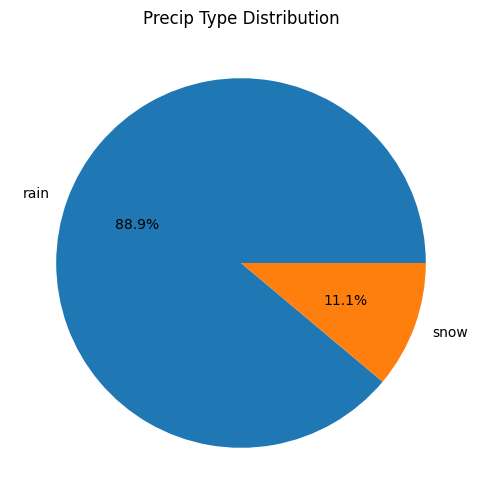

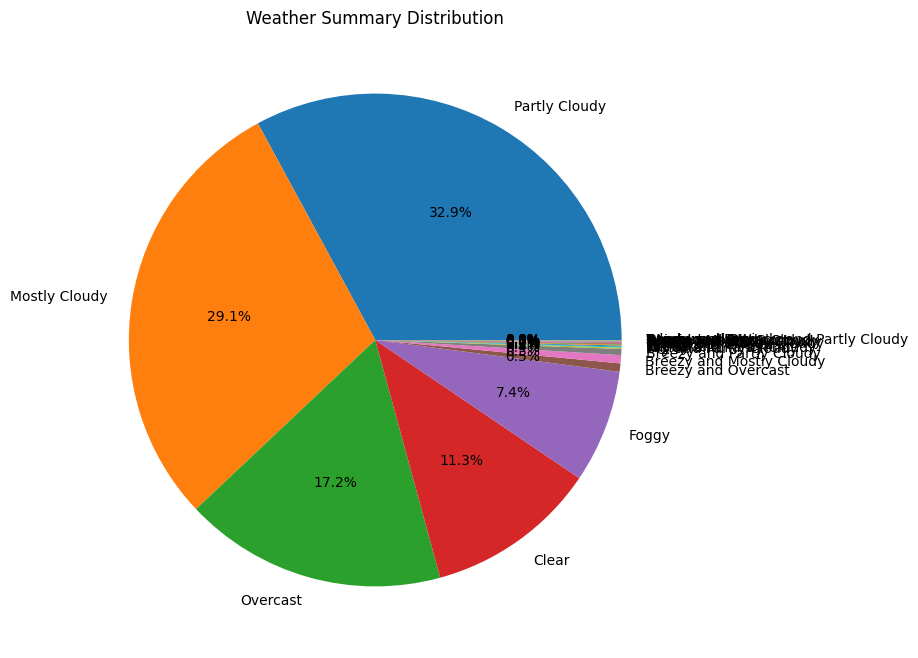

In [7]:
#Visulaization of data, to check the imbalance in the target class
import matplotlib.pyplot as plt
precip_counts = data['Precip Type'].value_counts()
precip_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title="Precip Type Distribution", ylabel="")
plt.show()
# to visualize the percentage of Summary of the weather
summary_counts = data['Summary'].value_counts()
summary_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), title="Weather Summary Distribution", ylabel="")
plt.show()



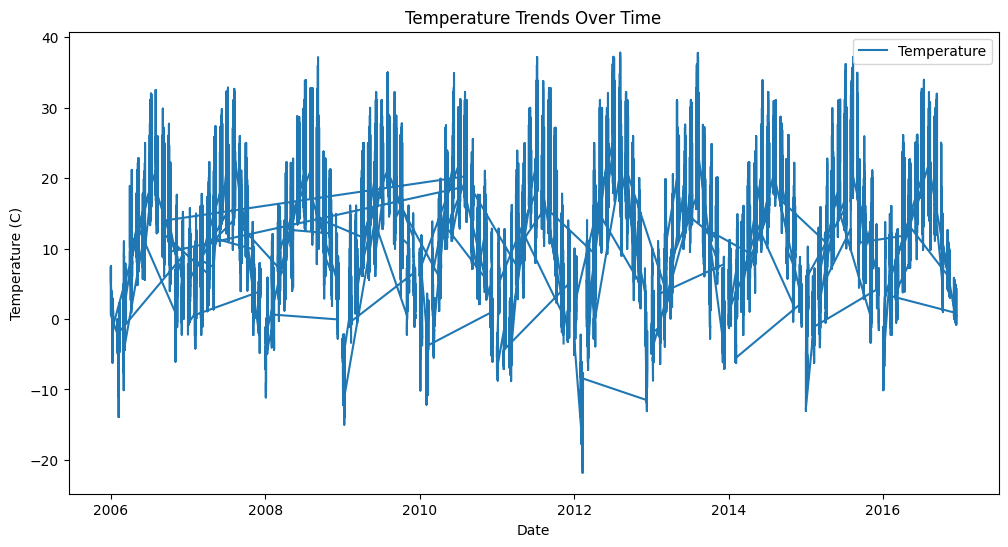

In [8]:
# to examine how the temperature changes over time
plt.figure(figsize=(12, 6))
plt.plot(data['Datetime'], data['Temperature (C)'], label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature Trends Over Time')
plt.legend()
plt.show()


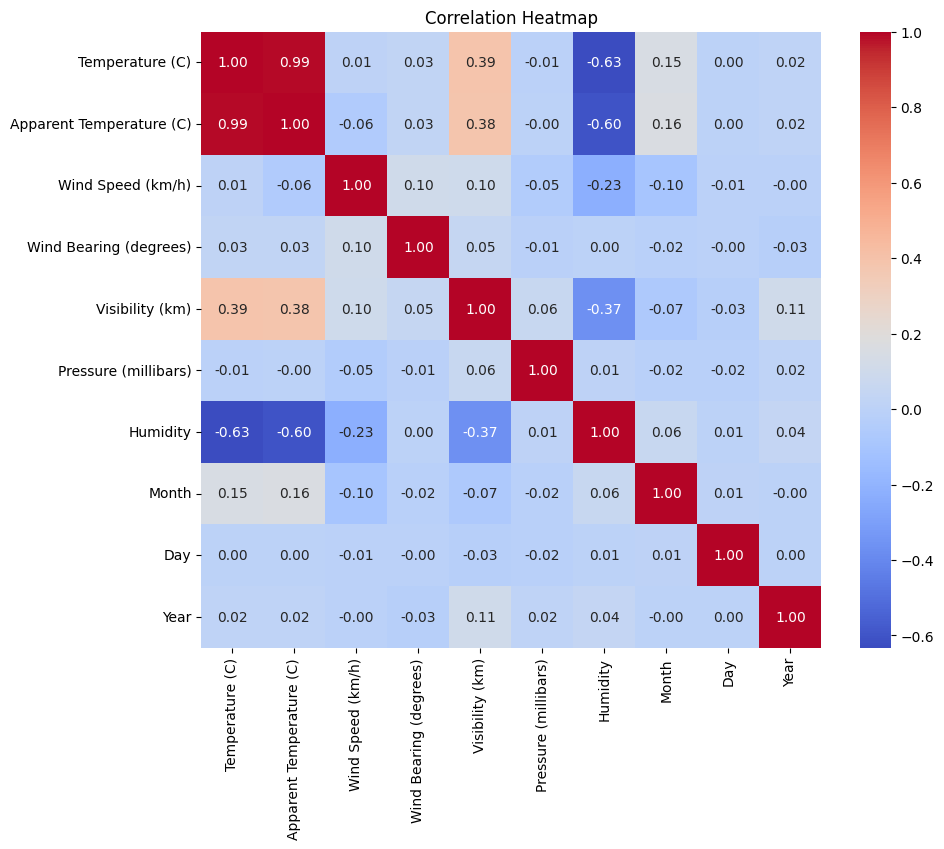

In [9]:
# this is a correlation matrix to check the compatibility of Numerical features with each other
import seaborn as sns
import matplotlib.pyplot as plt

numerical_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


In [10]:
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Humidity,Month,Day,Year,Datetime
0,Partly Cloudy,rain,9.472222,7.388889,14.1197,251,15.8263,1015.13,0.89,4,1,2006,2006-04-01
1,Partly Cloudy,rain,9.355556,7.227778,14.2646,259,15.8263,1015.63,0.86,4,1,2006,2006-04-01
2,Mostly Cloudy,rain,9.377778,9.377778,3.9284,204,14.9569,1015.94,0.89,4,1,2006,2006-04-01
3,Partly Cloudy,rain,8.288889,5.944444,14.1036,269,15.8263,1016.41,0.83,4,1,2006,2006-04-01
4,Mostly Cloudy,rain,8.755556,6.977778,11.0446,259,15.8263,1016.51,0.83,4,1,2006,2006-04-01


/usr/local/lib/python3.10/dist-packages/sklearn/gaussian_process/kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Naive Bayes:
Accuracy: 93.56%
              precision    recall  f1-score   support

        rain       1.00      0.93      0.96     25720
        snow       0.64      0.97      0.77      3208

    accuracy                           0.94     28928
   macro avg       0.82      0.95      0.87     28928
weighted avg       0.96      0.94      0.94     28928


Gaussian Processes:
Accuracy: 98.88%
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     25720
        snow       0.96      0.94      0.95      3208

    accuracy                           0.99     28928
   macro avg       0.97      0.97      0.97     28928
weighted avg       0.99      0.99      0.99     28928


Gaussian Processes:
Accuracy: 98.88%
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     25720
        snow       0.96      0.94      0.95      3208

    accuracy                           0.99     28928
   macro avg 

Text(0.5, 1.0, 'Confusion Matrix - Gaussian Processes')

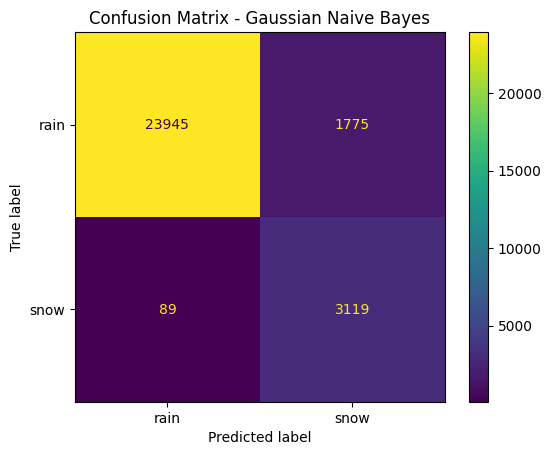

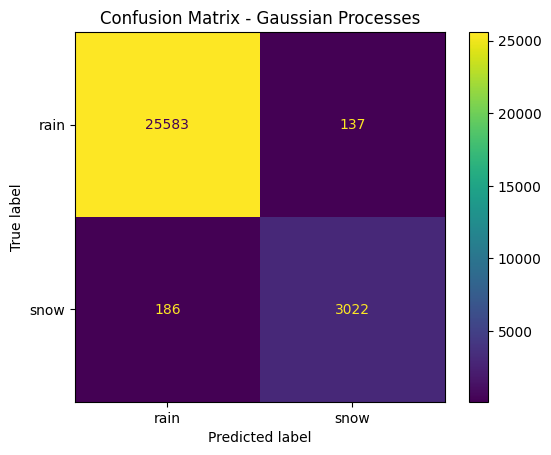

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import BayesianRidge
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Encode the target variable
label_encoder = LabelEncoder()
data['Precip Type Encoded'] = label_encoder.fit_transform(data['Precip Type'])

# Select features and target
features = data.drop(columns=['Precip Type', 'Datetime', 'Summary', 'Precip Type Encoded'])
target = data['Precip Type Encoded']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Scale features for models that require normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Step 3: Subsample for Gaussian Processes
gp_sample_size = 1000  # Use a smaller sample for Gaussian Processes
if len(X_train_scaled) > gp_sample_size:
    X_train_gp = X_train_scaled[:gp_sample_size]
    y_train_gp = y_train[:gp_sample_size]
else:
    X_train_gp = X_train_scaled
    y_train_gp = y_train

gp_kernel = 1.0 * RBF(length_scale=1.0)
gp_model = GaussianProcessClassifier(kernel=gp_kernel, random_state=42)
gp_model.fit(X_train_gp, y_train_gp)
y_pred_gp = gp_model.predict(X_test_scaled)
accuracy_gp = accuracy_score(y_test, y_pred_gp)


# Step 5: Print Results
print("Gaussian Naive Bayes:")
print(f"Accuracy: {accuracy_gnb * 100:.2f}%")
print(classification_report(y_test, y_pred_gnb, target_names=label_encoder.classes_))

print("\nGaussian Processes:")
print(f"Accuracy: {accuracy_gp * 100:.2f}%")
print(classification_report(y_test, y_pred_gp, target_names=label_encoder.classes_))

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=label_encoder.classes_)
disp_gnb.plot(cmap='viridis')
disp_gnb.ax_.set_title("Confusion Matrix - Gaussian Naive Bayes")

# Confusion Matrix for Gaussian Processes
cm_gp = confusion_matrix(y_test, y_pred_gp)
disp_gp = ConfusionMatrixDisplay(confusion_matrix=cm_gp, display_labels=label_encoder.classes_)
disp_gp.plot(cmap='viridis')
disp_gp.ax_.set_title("Confusion Matrix - Gaussian Processes")


Gaussian Naive Bayes:
Accuracy: 97.32%
              precision    recall  f1-score   support

        rain       0.98      0.99      0.99     25720
        snow       0.94      0.81      0.87      3208

    accuracy                           0.97     28928
   macro avg       0.96      0.90      0.93     28928
weighted avg       0.97      0.97      0.97     28928


Gaussian Processes:
Accuracy: 98.48%
              precision    recall  f1-score   support

        rain       0.99      0.99      0.99     25720
        snow       0.95      0.91      0.93      3208

    accuracy                           0.98     28928
   macro avg       0.97      0.95      0.96     28928
weighted avg       0.98      0.98      0.98     28928



Text(0.5, 1.0, 'Confusion Matrix - Gaussian Processes')

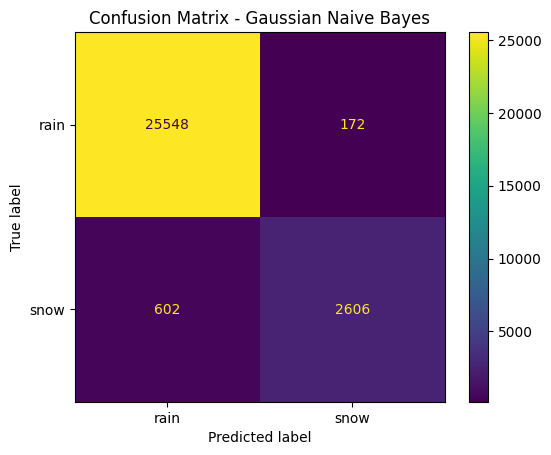

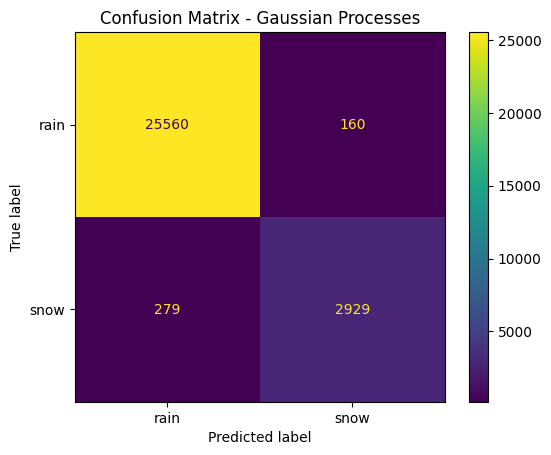

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import BayesianRidge
from sklearn.decomposition import PCA
import pandas as pd

# Encode the target variable
label_encoder = LabelEncoder()
data['Precip Type Encoded'] = label_encoder.fit_transform(data['Precip Type'])

# Select features and target
features = data.drop(columns=['Precip Type', 'Datetime', 'Summary', 'Precip Type Encoded'])
target = data['Precip Type Encoded']

# Apply PCA to reduce feature dimensions (if needed)
pca = PCA(n_components=5)  # Reduce to 5 principal components
features_pca = pca.fit_transform(features)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, target, test_size=0.3, random_state=42)

# Scale features for models that require normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Gaussian Naive Bayes
gnb_model = GaussianNB()
gnb_model.fit(X_train_scaled, y_train)
y_pred_gnb = gnb_model.predict(X_test_scaled)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

# Step 3: Subsample for Gaussian Processes
gp_sample_size = 1000  # Use a smaller sample for Gaussian Processes
if len(X_train_scaled) > gp_sample_size:
    X_train_gp = X_train_scaled[:gp_sample_size]
    y_train_gp = y_train[:gp_sample_size]
else:
    X_train_gp = X_train_scaled
    y_train_gp = y_train

gp_kernel = 1.0 * RBF(length_scale=1.0)
gp_model = GaussianProcessClassifier(kernel=gp_kernel, random_state=42)
gp_model.fit(X_train_gp, y_train_gp)
y_pred_gp = gp_model.predict(X_test_scaled)
accuracy_gp = accuracy_score(y_test, y_pred_gp)


# Step 5: Print Results
print("Gaussian Naive Bayes:")
print(f"Accuracy: {accuracy_gnb * 100:.2f}%")
print(classification_report(y_test, y_pred_gnb, target_names=label_encoder.classes_))

print("\nGaussian Processes:")
print(f"Accuracy: {accuracy_gp * 100:.2f}%")
print(classification_report(y_test, y_pred_gp, target_names=label_encoder.classes_))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=label_encoder.classes_)
disp_gnb.plot(cmap='viridis')
disp_gnb.ax_.set_title("Confusion Matrix - Gaussian Naive Bayes")

# Confusion Matrix for Gaussian Processes
cm_gp = confusion_matrix(y_test, y_pred_gp)
disp_gp = ConfusionMatrixDisplay(confusion_matrix=cm_gp, display_labels=label_encoder.classes_)
disp_gp.plot(cmap='viridis')
disp_gp.ax_.set_title("Confusion Matrix - Gaussian Processes")


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv("/content/Climate of England _ Professional Reforms.csv")
# Encode the target variable
label_encoder = LabelEncoder()
data['Summary_encoded'] = label_encoder.fit_transform(data['Summary'])

# Define features and target
X = data[['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
          'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Humidity']]
y_classification = data['Summary_encoded']

# Check class distribution
class_distribution = pd.Series(y_classification).value_counts()
print("Class Distribution Before SMOTE:\n", class_distribution)

# Handle small classes (remove if necessary)
min_samples_threshold = 3  # Minimum samples for SMOTE
small_classes = class_distribution[class_distribution < min_samples_threshold].index
X = X[~y_classification.isin(small_classes)]
y_classification = y_classification[~y_classification.isin(small_classes)]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # k_neighbors adjusted to 2
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_classification)

# Check class distribution after SMOTE
balanced_distribution = pd.Series(y_balanced).value_counts()
print("Class Distribution After SMOTE:\n", balanced_distribution)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# ==========================
# Gaussian Naive Bayes (GNB)
# ==========================
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

# Evaluate Gaussian Naive Bayes
unique_classes_gnb = sorted(set(y_test).union(set(y_pred_gnb)))
target_names_gnb = [label_encoder.classes_[i] for i in unique_classes_gnb]

classification_results_gnb = classification_report(
    y_test, y_pred_gnb, target_names=target_names_gnb, labels=unique_classes_gnb
)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Classification Results:\n", classification_results_gnb)
print(f"Accuracy (GNB): {accuracy_gnb * 100:.2f}%")

# ====================================
# Gaussian Process Classifier (GPC)
# ====================================
print("\n=== Gaussian Process Classifier ===")
kernel = RBF()  # Radial Basis Function kernel
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)
y_pred_gpc = gpc.predict(X_test)

# Evaluate Gaussian Process Classifier
unique_classes_gpc = sorted(set(y_test).union(set(y_pred_gpc)))
target_names_gpc = [label_encoder.classes_[i] for i in unique_classes_gpc]

classification_results_gpc = classification_report(
    y_test, y_pred_gpc, target_names=target_names_gpc, labels=unique_classes_gpc
)
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)
print("Gaussian Process Classifier Results:\n", classification_results_gpc)
print(f"Accuracy (GPC): {accuracy_gpc * 100:.2f}%")

# ======================
# Compare Results
# ======================
print("\n=== Comparison of Models ===")
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb * 100:.2f}%")
print(f"Gaussian Process Classifier Accuracy: {accuracy_gpc * 100:.2f}%")


Class Distribution Before SMOTE:
 Summary_encoded
15    9088
13    6855
14    4390
6     3828
10    1730
2      146
4      134
3       93
20      31
8       17
0       16
9       14
19       8
11       7
1        7
18       7
12       4
17       2
7        1
16       1
5        1
Name: count, dtype: int64
Class Distribution After SMOTE:
 Summary_encoded
15    9088
12    9088
18    9088
9     9088
0     9088
20    9088
1     9088
19    9088
11    9088
13    9088
3     9088
4     9088
6     9088
2     9088
10    9088
14    9088
8     9088
Name: count, dtype: int64
Gaussian Naive Bayes Classification Results:
                           precision    recall  f1-score   support

                  Breezy       0.87      0.71      0.78      2822
        Breezy and Foggy       1.00      0.99      1.00      2754
Breezy and Mostly Cloudy       0.40      0.68      0.50      2638
     Breezy and Overcast       0.59      0.65      0.62      2742
Breezy and Partly Cloudy       0.14      0.01      0.0

Class Distribution Before SMOTE:
 Summary_encoded
19    31733
17    28094
18    16597
6     10890
12     7148
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
2        35
24       35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
22        1
7         1
1         1
Name: count, dtype: int64
Class Distribution After SMOTE:
 Summary_encoded
19    31733
17    31733
10    31733
8     31733
16    31733
14    31733
21    31733
9     31733
24    31733
11    31733
0     31733
26    31733
2     31733
25    31733
23    31733
15    31733
13    31733
4     31733
5     31733
6     31733
3     31733
12    31733
18    31733
20    31733
Name: count, dtype: int64
Gaussian Naive Bayes Classification Results:
                           precision    recall  f1-score   support

                  Breezy       0.86      0.47      0.61      9403
        Breezy and Foggy       0.98      0.96      0.97   

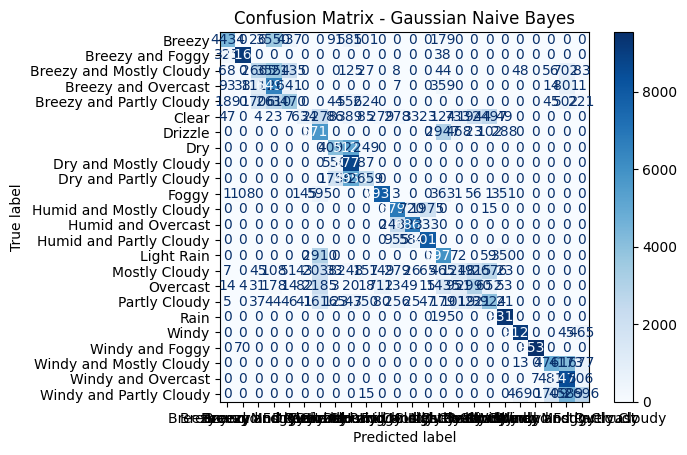

In [2]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = '/content/Climate of England _ Professional Reforms.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Encode the target column "Summary" for classification
label_encoder = LabelEncoder()
data['Summary_encoded'] = label_encoder.fit_transform(data['Summary'])

# Define features and target
X = data[['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
          'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Humidity']]
y_classification = data['Summary_encoded']

# Check class distribution
class_distribution = pd.Series(y_classification).value_counts()
print("Class Distribution Before SMOTE:\n", class_distribution)

# Handle small classes (remove if necessary)
min_samples_threshold = 3  # Minimum samples for SMOTE
small_classes = class_distribution[class_distribution < min_samples_threshold].index
X = X[~y_classification.isin(small_classes)]
y_classification = y_classification[~y_classification.isin(small_classes)]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # k_neighbors adjusted to 2
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_classification)

# Check class distribution after SMOTE
balanced_distribution = pd.Series(y_balanced).value_counts()
print("Class Distribution After SMOTE:\n", balanced_distribution)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Gaussian Naive Bayes for Classification
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

# Evaluate Gaussian Naive Bayes
unique_classes = sorted(set(y_test).union(set(y_pred)))
target_names = [label_encoder.classes_[i] for i in unique_classes]

classification_results = classification_report(
    y_test, y_pred, target_names=target_names, labels=unique_classes
)
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naive Bayes Classification Results:\n", classification_results)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix for Gaussian Naive Bayes
cm_gnb = confusion_matrix(y_test, y_pred, labels=unique_classes)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=target_names)
disp_gnb.plot(cmap="Blues")
disp_gnb.ax_.set_title("Confusion Matrix - Gaussian Naive Bayes")

# Stratified Cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(gnb, X_balanced, y_balanced, cv=stratified_kfold)
print(f"Stratified Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


In [ ]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the kernel for Gaussian Process Classifier
kernel = 1.0 * RBF()  # Radial Basis Function kernel

# Gaussian Process Classifier
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)
y_pred_gpc = gpc.predict(X_test)

# Evaluate Gaussian Process Classifier
unique_classes_gpc = sorted(set(y_test).union(set(y_pred_gpc)))
target_names_gpc = [label_encoder.classes_[i] for i in unique_classes_gpc]

classification_results_gpc = classification_report(
    y_test, y_pred_gpc, target_names=target_names_gpc, labels=unique_classes_gpc
)
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)
print("Gaussian Process Classifier Classification Results:\n", classification_results_gpc)
print(f"Accuracy: {accuracy_gpc * 100:.2f}%")

cm_gnb = confusion_matrix(y_test, y_pred_gpc, labels=unique_classes)
disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=target_names)
disp_gnb.plot(cmap="Blues")
disp_gnb.ax_.set_title("Confusion Matrix - Gaussian Processes")

# Stratified Cross-validation
stratified_kfold_gpc = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_gpc = cross_val_score(gpc, X_balanced, y_balanced, cv=stratified_kfold_gpc)
print(f"Stratified Cross-Validation Accuracy (GPC): {cv_scores_gpc.mean() * 100:.2f}%")


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv("/content/Climate of England _ Professional Reforms.csv")
# Encode the target variable
label_encoder = LabelEncoder()
data['Summary_encoded'] = label_encoder.fit_transform(data['Summary'])

# Define features and target
X = data[['Temperature (C)', 'Apparent Temperature (C)', 'Wind Speed (km/h)',
          'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)', 'Humidity']]
y_classification = data['Summary_encoded']

# Check class distribution
class_distribution = pd.Series(y_classification).value_counts()
print("Class Distribution Before SMOTE:\n", class_distribution)

# Handle small classes (remove if necessary)
min_samples_threshold = 3  # Minimum samples for SMOTE
small_classes = class_distribution[class_distribution < min_samples_threshold].index
X = X[~y_classification.isin(small_classes)]
y_classification = y_classification[~y_classification.isin(small_classes)]

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SMOTE with adjusted k_neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # k_neighbors adjusted to 2
X_balanced, y_balanced = smote.fit_resample(X_scaled, y_classification)

# Check class distribution after SMOTE
balanced_distribution = pd.Series(y_balanced).value_counts()
print("Class Distribution After SMOTE:\n", balanced_distribution)

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Gaussian Process Classifier
print("\n=== Gaussian Process Classifier ===")
kernel = RBF()  # Radial Basis Function kernel
gpc = GaussianProcessClassifier(kernel=kernel, random_state=42)
gpc.fit(X_train, y_train)
y_pred_gpc = gpc.predict(X_test)

# Evaluate Gaussian Process Classifier
unique_classes_gpc = sorted(set(y_test).union(set(y_pred_gpc)))
target_names_gpc = [label_encoder.classes_[i] for i in unique_classes_gpc]

classification_results_gpc = classification_report(
    y_test, y_pred_gpc, target_names=target_names_gpc, labels=unique_classes_gpc
)
accuracy_gpc = accuracy_score(y_test, y_pred_gpc)

print("Gaussian Process Classifier Results:\n", classification_results_gpc)
print(f"Accuracy (GPC): {accuracy_gpc * 100:.2f}%")


Class Distribution Before SMOTE:
 Summary_encoded
19    31733
17    28094
18    16597
6     10890
12     7148
4       528
3       516
5       386
11       86
26       67
16       63
0        54
25       45
13       40
8        39
2        35
24       35
9        34
15       17
10       14
20       10
21        8
14        7
23        4
22        1
7         1
1         1
Name: count, dtype: int64
Class Distribution After SMOTE:
 Summary_encoded
19    31733
17    31733
10    31733
8     31733
16    31733
14    31733
21    31733
9     31733
24    31733
11    31733
0     31733
26    31733
2     31733
25    31733
23    31733
15    31733
13    31733
4     31733
5     31733
6     31733
3     31733
12    31733
18    31733
20    31733
Name: count, dtype: int64

=== Gaussian Process Classifier ===


In [7]:
import pandas as pd
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Drop rows with missing values in 'Temperature' (target column)
data = data.dropna(subset=['Temperature (C)'])

# Step 2: Feature and Target Selection

# Select features and target
features = data.drop(columns=['Temperature (C)', 'Datetime', 'Summary', 'Precip Type'])
target = data['Temperature (C)']

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=42)

# Step 4: Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha_1': [1e-6, 1e-5, 1e-4],
    'alpha_2': [1e-6, 1e-5, 1e-4],
    'lambda_1': [1e-6, 1e-5, 1e-4],
    'lambda_2': [1e-6, 1e-5, 1e-4]
}

# Initialize the Bayesian Ridge model
bayesian_ridge_model = BayesianRidge()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=bayesian_ridge_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Step 5: Best hyperparameters from grid search
print(f"Best hyperparameters: {grid_search.best_params_}")

# Step 6: Model evaluation with best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test)

# Step 7: Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Bayesian Ridge Regression Results with Hyperparameter Tuning:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")




Best hyperparameters: {'alpha_1': 1e-06, 'alpha_2': 1e-06, 'lambda_1': 0.0001, 'lambda_2': 1e-06}
Bayesian Ridge Regression Results with Hyperparameter Tuning:
Mean Squared Error: 0.91
R-squared (R2) Score: 0.99


In [ ]:
!pip install hmmlearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 2.7 MB/s eta 0:00:00
